01 Using Nipype to load fMRI data
=====================
### Date: Feb 6 2018
### Author: Farahana

We will use new Python Package called Nipype to deal with fMRI data. 
There are many different ways to get the data using this package. 
We will use *SelectFiles* for this step. 

In [1]:
from nipype import SelectFiles, Node

/home/farahana/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


There are few informations we have to know before hand, such as;
1. the directory
2. the string
3. how to import/design of new import

As example, we are using ds052 data from OpenfMRI.
1. Directory: **/home/farahana/Documents/dataset/ds052/**   
2. String;

    *anat*: **/ds052/sub-01/anat/sub-01_run-1_T1w.nii.gz**    
    *func*: **/ds052/sub-01/func/sub-01_task-reversalweatherprediction_run-1_bold.nii.gz**         
3. How to import:
    
~~~  
/ds052/sub-{subject_id}/anat/sub-{subject_id}_run-{ses_no}_T1w.nii.gz
/ds052/sub-{subject_id}/func/sub-{subject_id}_task-{task_name}_run-{ses_no}_bold.nii.gz
~~~

### One subject calls

In [2]:
# The template string
templates_1s = { 'anat' : 'sub-{subject_id}/anat/sub-{subject_id}_run-{ses_no}_T1w.nii.gz',
              'func' : 'sub-{subject_id}/func/sub-{subject_id}_task-{task_name}_run-{ses_no}_bold.nii.gz'}

In [3]:
# How to address and import using SelectFiles node
sf_1s = Node(SelectFiles(templates_1s),
          name='selectfiles')

In [4]:
# Location of the dataset folder
sf_1s.inputs.base_directory = '/home/farahana/Documents/dataset/ds052'

> Feed {}-based placeholder strings with values
~~~python
sf.inputs.subject_id = '01'-'14'
sf.inputs.ses_no = "1","2"
sf.inputs.task_name = 'reversalweatherprediction','weatherprediction'
~~~

In [5]:
# We will feed the {}-based placeholder strings with values
sf_1s.inputs.subject_id = '01'
sf_1s.inputs.ses_no = "1"
sf_1s.inputs.task_name = 'reversalweatherprediction'

Then, we can view the output:

In [6]:
sf_1s.run().outputs

180211-15:41:10,80 workflow INFO:
	 Executing node selectfiles in dir: /tmp/tmp7gh93_6v/selectfiles
180211-15:41:10,83 workflow INFO:
	 Running node "selectfiles" ("nipype.interfaces.io.SelectFiles").



anat = /home/farahana/Documents/dataset/ds052/sub-01/anat/sub-01_run-1_T1w.nii.gz
func = /home/farahana/Documents/dataset/ds052/sub-01/func/sub-01_task-reversalweatherprediction_run-1_bold.nii.gz

### Multiple subjects calls

In [7]:
# The template string
templates = { 'anat' : 'sub-*/anat/sub-*_run-{ses_no}_T1w.nii.gz',
              'func' : 'sub-*/func/sub-*_task-{task_name}_run-{ses_no}_bold.nii.gz'}

In [8]:
# How to address and import using SelectFiles node
sf = Node(SelectFiles(templates),
          name='selectfiles')

In [9]:
sf.inputs.base_directory = '/home/farahana/Documents/dataset/ds052'

In [10]:
# We will feed the {}-based placeholder strings with values
sf.inputs.ses_no = "1"
sf.inputs.task_name = 'reversalweatherprediction'

In [11]:
sf.run().outputs

180211-15:41:12,984 workflow INFO:
	 Executing node selectfiles in dir: /tmp/tmpjmxoas5c/selectfiles
180211-15:41:12,987 workflow INFO:
	 Running node "selectfiles" ("nipype.interfaces.io.SelectFiles").



anat = ['/home/farahana/Documents/dataset/ds052/sub-01/anat/sub-01_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-02/anat/sub-02_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-03/anat/sub-03_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-04/anat/sub-04_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-05/anat/sub-05_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-06/anat/sub-06_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-07/anat/sub-07_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-08/anat/sub-08_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-09/anat/sub-09_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-10/anat/sub-10_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-12/anat/sub-12_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-13/anat/sub-13_run-1_T1w.nii.gz', '/home/farahana/Documents/dataset/ds052/sub-14/anat/sub

### Experiment Parameters
We will specify the important parameters here such as the output and working directories, 
smoothing widths and other pre-processing workflows params.

In [12]:
experiment_dir = '/output'
output_dir = 'datasink'
working_dir = 'workingdir'

# Smoothing widths to apply
fwhm = [4, 8]

# Isometric resample of functional images to voxel size (in mm)
iso_size = 4

Let us try the example of preprocessing workflow shown in nipype website: 
[nipype_tutorial](https://miykael.github.io/nipype_tutorial/notebooks/example_preprocessing.html)

### Interfaces

In [13]:
%matplotlib inline

In [14]:
from nilearn.plotting import plot_img, plot_anat, plot_stat_map

# Import BET from the FSL interface
from nipype.interfaces.fsl import BET

#### Create Node

In [15]:
#---- Form 1
skullstrip = BET(in_file="/home/farahana/Documents/dataset/ds052/sub-01/anat/sub-01_run-2_T1w.nii.gz",
                out_file = "output/node_T1w_bet.nii.gz", mask = True)

In [17]:
#---- Form 2
#skullstrip.inputs.in_file = "/home/farahana/Documents/dataset/ds052/sub-01/anat/sub-01_run-2_T1w.nii.gz"
#skullstrip.inputs.out_file = "output/node_T1w_bet.nii"

In [19]:
# Command line execution
# skullstrip.cmdline
# !bet /home/farahana/Documents/dataset/ds052/sub-01/anat/sub-01_run-2_T1w.nii.gz output/node_T1w_bet.nii.gz

#### Run the BET

In [22]:
skullstrip.run()

### Plotting the input and output of BET (Brain Extraction)

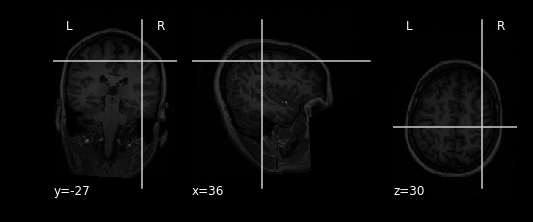

In [23]:
plot_anat('/home/farahana/Documents/dataset/ds052/sub-01/anat/sub-01_run-2_T1w.nii.gz', cut_coords=(36, -27, 30))

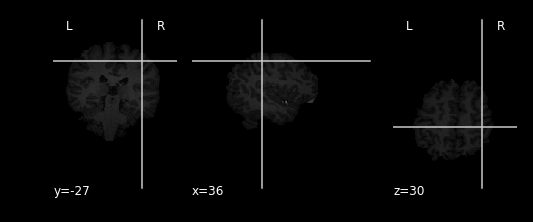

In [24]:
plot_anat('output/node_T1w_bet.nii.gz', cut_coords=(36, -27, 30))

In [25]:
# plot_stat_map('output/node_T1w_bet.nii.gz', cut_coords=(36, -27, 30))

### BET with func datas

In [28]:
skullstrip_func = BET(in_file="/home/farahana/Documents/dataset/ds052/sub-01/func/sub-01_task-reversalweatherprediction_run-1_bold.nii.gz",
                      out_file = "output/func_T1w_bet.nii.gz")

In [29]:
skullstrip_func.run()

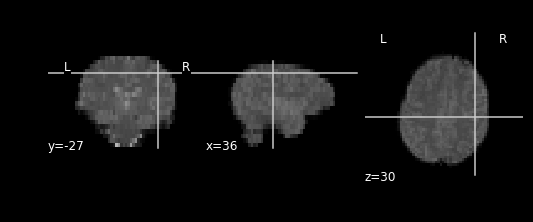

In [31]:
plot_anat('output/func_T1w_bet.nii.gz', cut_coords=(36, -27, 30))

### Nodes for main workflow

In [ ]:
# ExtractROI - skip dummy scans
extract = Node(ExtractROI(t_min=4, t_size=-1),
               output_type='NIFTI',
               name="extract")

# MCFLIRT - motion correction
mcflirt = Node(MCFLIRT(mean_vol=True,
                       save_plots=True,
                       output_type='NIFTI'),
               name="mcflirt")

# SliceTimer - correct for slice wise acquisition
slicetimer = Node(SliceTimer(index_dir=False,
                             interleaved=True,
                             output_type='NIFTI',
                             time_repetition=TR),
                  name="slicetimer")

# Smooth - image smoothing
smooth = Node(Smooth(), name="smooth")
smooth.iterables = ("fwhm", fwhm)

# Artifact Detection - determines outliers in functional images
art = Node(ArtifactDetect(norm_threshold=2,
                          zintensity_threshold=3,
                          mask_type='spm_global',
                          parameter_source='FSL',
                          use_differences=[True, False],
                          plot_type='svg'),
           name="art")